# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder, AnnealingScheduler

## 2. Configure GPU (if available)

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [4]:
PROPERTY_NAME = "logp06"

## 4. Set directories (for inputs and outputs)

In [5]:
input_dir = os.path.join("DATA", PROPERTY_NAME)

In [6]:
_output_dir = "outputs_Tutorial_1_MTMR_pretraining_latent8"
if not os.path.exists(_output_dir):
    os.mkdir(_output_dir)

output_dir = os.path.join(_output_dir, PROPERTY_NAME)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [7]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [8]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [9]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

In [10]:
#print(dataset.shape)
#dataset.head()

In [11]:
#print(dataset_valid.shape)
#dataset_valid.head()

## 7. Initialize a generator of MTMR

In [12]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":8,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [13]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 3.370  loss_recon_src(tr): 3.370  loss_recon_tar(tr): 3.369  loss_recon_neg(tr): 3.370  loss_contractive(tr): 0.026  loss_margin(tr): 2.565  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.160  similarity(va): 0.004
[00001000/00100000]  loss(tr): 0.744  loss_recon_src(tr): 0.747  loss_recon_tar(tr): 0.700  loss_recon_neg(tr): 0.735  loss_contractive(tr): 0.673  loss_margin(tr): 0.122  beta: 0.020  gamma: 0.020  valid_ratio(va): 0.970  similarity(va): 0.119
[00002000/00100000]  loss(tr): 0.656  loss_recon_src(tr): 0.641  loss_recon_tar(tr): 0.612  loss_recon_neg(tr): 0.639  loss_contractive(tr): 0.512  loss_margin(tr): 0.107  beta: 0.040  gamma: 0.040  valid_ratio(va): 0.990  similarity(va): 0.135
[00003000/00100000]  loss(tr): 0.603  loss_recon_src(tr): 0.577  loss_recon_tar(tr): 0.553  loss_recon_neg(tr): 0.576  loss_contractive(tr): 0.447  loss_margin(tr): 0.106  beta: 0.060  gamma: 0.060  valid_ratio(va): 0.995  similarity(va): 0.145
[00004000/00100000] 

[00034000/00100000]  loss(tr): 0.512  loss_recon_src(tr): 0.412  loss_recon_tar(tr): 0.393  loss_recon_neg(tr): 0.381  loss_contractive(tr): 0.133  loss_margin(tr): 0.040  beta: 0.680  gamma: 0.680  valid_ratio(va): 1.000  similarity(va): 0.173
[00035000/00100000]  loss(tr): 0.524  loss_recon_src(tr): 0.363  loss_recon_tar(tr): 0.374  loss_recon_neg(tr): 0.369  loss_contractive(tr): 0.152  loss_margin(tr): 0.070  beta: 0.700  gamma: 0.700  valid_ratio(va): 1.000  similarity(va): 0.175
[00036000/00100000]  loss(tr): 0.511  loss_recon_src(tr): 0.370  loss_recon_tar(tr): 0.358  loss_recon_neg(tr): 0.392  loss_contractive(tr): 0.117  loss_margin(tr): 0.072  beta: 0.720  gamma: 0.720  valid_ratio(va): 1.000  similarity(va): 0.178
[00037000/00100000]  loss(tr): 0.471  loss_recon_src(tr): 0.379  loss_recon_tar(tr): 0.372  loss_recon_neg(tr): 0.368  loss_contractive(tr): 0.080  loss_margin(tr): 0.053  beta: 0.740  gamma: 0.740  valid_ratio(va): 1.000  similarity(va): 0.176
[00038000/00100000] 

[00068000/00100000]  loss(tr): 0.510  loss_recon_src(tr): 0.345  loss_recon_tar(tr): 0.354  loss_recon_neg(tr): 0.340  loss_contractive(tr): 0.102  loss_margin(tr): 0.062  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.186
[00069000/00100000]  loss(tr): 0.533  loss_recon_src(tr): 0.358  loss_recon_tar(tr): 0.339  loss_recon_neg(tr): 0.356  loss_contractive(tr): 0.075  loss_margin(tr): 0.106  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.182
[00070000/00100000]  loss(tr): 0.438  loss_recon_src(tr): 0.335  loss_recon_tar(tr): 0.340  loss_recon_neg(tr): 0.365  loss_contractive(tr): 0.067  loss_margin(tr): 0.022  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.178
[00071000/00100000]  loss(tr): 0.528  loss_recon_src(tr): 0.330  loss_recon_tar(tr): 0.331  loss_recon_neg(tr): 0.348  loss_contractive(tr): 0.115  loss_margin(tr): 0.075  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.189
[00072000/00100000] 

## 9. Visualize for loss analysis

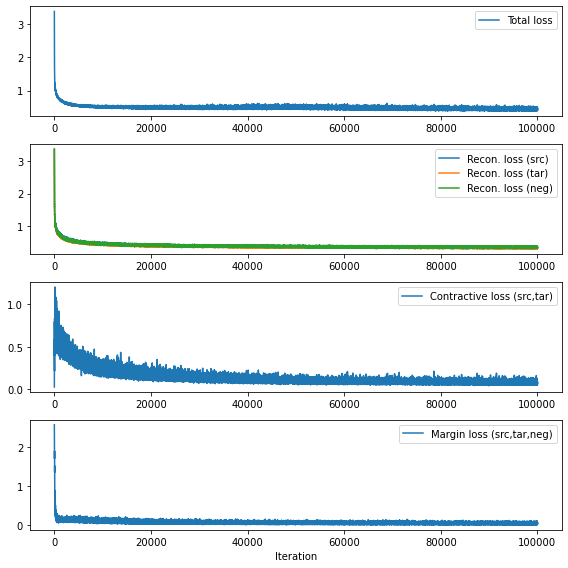

In [14]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

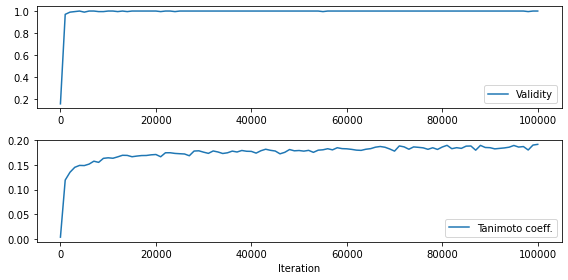

In [15]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()